# Transfer Learning using Keras for models:
- **InceptionV3**
- **ResNet50**
- **ResNet152**
- **VGG16**
- **VGG19**
- **Mobile Net**

In [1]:
# import the libraries as shown below

# !pip install tensorflow

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet import ResNet152
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_v3_preprocess_input
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_v2_preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
MODEL_TO_TRAIN = 'mobilenet_v2'

In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
resnet152 = ResNet152(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
mobilenet_v2 = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
our_models = {
    'inception' : inception,
    'resnet' : resnet,
    'resnet152' : resnet152,
    'vgg16' : vgg16,
    'vgg19' : vgg19,
    'mobilenet_v2' :mobilenet_v2
}

In [14]:
# don't train existing weights
for layer in our_models[MODEL_TO_TRAIN].layers:
    layer.trainable = False

  # useful for getting number of output classes
folders = glob('Cotton Disease/train/*')
print('Number of Classes: ' , str(len(folders)))

# our layers - you can add more if you want
x = Flatten()(our_models[MODEL_TO_TRAIN].output)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs = our_models[MODEL_TO_TRAIN].input, outputs=prediction)

# view the structure of the model
model.summary()

Number of Classes:  4
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                     

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
train_path = 'Cotton Disease/train'
val_path = 'Cotton Disease/val'

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [19]:
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 253 images belonging to 4 classes.


In [20]:
# Which Labels What?
label_map = (training_set.class_indices)
label_map

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [21]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data = val_set,
  epochs = 5,
  steps_per_epoch = len(training_set),
  validation_steps = len(val_set)
)

Epoch 1/5
61/61 [==============================] - 58s 904ms/step - loss: 2.2123 - accuracy: 0.8180 - val_loss: 0.7759 - val_accuracy: 0.9130
Epoch 2/5
61/61 [==============================] - 35s 575ms/step - loss: 0.5936 - accuracy: 0.9293 - val_loss: 0.2828 - val_accuracy: 0.9486
Epoch 3/5
61/61 [==============================] - 41s 677ms/step - loss: 0.4830 - accuracy: 0.9431 - val_loss: 1.1765 - val_accuracy: 0.8775
Epoch 4/5
61/61 [==============================] - 48s 783ms/step - loss: 0.3761 - accuracy: 0.9564 - val_loss: 0.3399 - val_accuracy: 0.9605
Epoch 5/5
61/61 [==============================] - 54s 887ms/step - loss: 0.2567 - accuracy: 0.9692 - val_loss: 0.8746 - val_accuracy: 0.9012


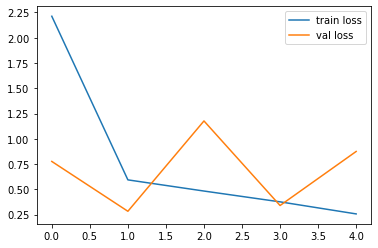

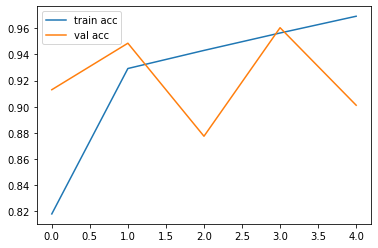

<Figure size 432x288 with 0 Axes>

In [22]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_mobilenetv2.h5')

In [24]:
y_pred = model.predict(val_set)
y_pred

8/8 [==============================] - 3s 305ms/step


array([[5.1353558e-25, 1.0931497e-27, 3.5901628e-24, 1.0000000e+00],
       [4.9924419e-23, 2.5938305e-24, 1.0000000e+00, 4.3204752e-19],
       [3.4330649e-27, 1.0000000e+00, 1.8794991e-28, 1.9397681e-20],
       ...,
       [1.0941032e-23, 4.8842225e-11, 1.9608339e-16, 1.0000000e+00],
       [6.2061903e-28, 2.2678873e-13, 3.6801220e-34, 1.0000000e+00],
       [1.1733883e-25, 6.8833112e-23, 7.2252089e-32, 1.0000000e+00]],
      dtype=float32)

In [25]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([3, 2, 1, 0, 3, 1, 2, 3, 3, 2, 0, 2, 1, 0, 3, 0, 1, 1, 0, 2, 3, 3,
       1, 1, 1, 2, 1, 2, 3, 2, 3, 2, 2, 3, 1, 3, 1, 3, 1, 3, 3, 1, 0, 3,
       2, 3, 3, 1, 0, 2, 3, 1, 2, 3, 3, 3, 3, 3, 0, 1, 0, 1, 1, 3, 1, 2,
       3, 1, 3, 2, 2, 3, 0, 0, 3, 0, 2, 1, 1, 3, 2, 0, 0, 3, 0, 2, 1, 0,
       2, 3, 3, 2, 1, 0, 1, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 1, 0, 0, 0,
       2, 3, 3, 3, 1, 2, 0, 2, 3, 1, 2, 3, 3, 2, 2, 2, 2, 0, 2, 1, 3, 3,
       3, 1, 0, 3, 2, 1, 0, 3, 2, 0, 0, 2, 3, 2, 3, 2, 1, 3, 3, 3, 0, 1,
       3, 0, 3, 2, 1, 0, 1, 1, 3, 3, 1, 3, 2, 0, 1, 1, 2, 3, 3, 1, 3, 1,
       1, 2, 1, 1, 2, 3, 1, 2, 3, 1, 2, 3, 0, 2, 1, 1, 0, 3, 1, 2, 1, 0,
       1, 3, 0, 2, 2, 2, 0, 0, 1, 1, 3, 3, 1, 2, 3, 3, 2, 2, 3, 3, 1, 1,
       2, 3, 3, 3, 3, 1, 3, 2, 0, 3, 3, 2, 1, 3, 2, 2, 1, 0, 2, 2, 3, 2,
       1, 3, 1, 1, 0, 0, 0, 1, 3, 3, 3], dtype=int64)

In [30]:
from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(y_pred, val_set.classes))
print('F-1 score is :', f1_score(y_pred, val_set.classes, average='macro'))

[[ 6 20  9 11]
 [13 15 18 17]
 [10 15 17 16]
 [14 28 22 22]]
F-1 score is : 0.22781616267964722
